<a href="https://colab.research.google.com/github/Emanuel-Acosta/challege-telecom-X2/blob/main/challenge_telecom_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TelecomX Parte 2

In [53]:
import pandas as pd

# URL del archivo CSV en formato RAW
url = 'https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/df_telecomx1.csv'

# Leer el archivo CSV desde GitHub
df_telecomx1 = pd.read_csv(url)

df_telecomx1.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_diarias
0,0002-ORFBO,no,Female,0,yes,yes,9,yes,no,DSL,...,no,yes,yes,no,One year,yes,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,no,Male,0,no,no,9,yes,yes,DSL,...,no,no,no,yes,Month-to-month,no,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,yes,Male,0,no,no,4,yes,no,Fiber optic,...,yes,no,no,no,Month-to-month,yes,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,yes,Male,1,yes,no,13,yes,no,Fiber optic,...,yes,no,yes,yes,Month-to-month,yes,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,yes,Female,1,yes,no,3,yes,no,Fiber optic,...,no,yes,yes,no,Month-to-month,yes,Mailed check,83.9,267.40,2.8


## Limpieza y Transformación de Datos para Machine Learning y one-hot encoding.

### Eliminar columnas irrelevantes




In [54]:
df_telecomx1.drop(columns=['ID_Cliente'], inplace=True)

### Convertir la variable objetivo (Cancelación) a numérica
Está en formato 'yes' / 'no', así que conviene convertirla a 1 (sí canceló) y 0 (no canceló).

In [55]:
df_telecomx1['Cancelacion'] = df_telecomx1['Cancelacion'].map({'yes': 1, 'no': 0})

### Codificar variables categóricas binarias
Estas variables están en formato 'yes' / 'no'. Conviene convertirlas a 1/0:

In [56]:
# Encuentra columnas con yes/no
binarias = df_telecomx1.columns[df_telecomx1.isin(['yes', 'no']).any()]

# Convierte yes/no a 1/0
df_telecomx1[binarias] = df_telecomx1[binarias].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [57]:
# Limpiar espacios y convertir a minúsculas
df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].str.strip().str.lower()

# Mapear valores a 1 y 0
df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].replace({
    'yes': 1,
    'no': 0,
    'no internet service': 0
})

/tmp/ipython-input-174670821.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecomx1['Suscripcion_Seguridad_En_Linea'] = df_telecomx1['Suscripcion_Seguridad_En_Linea'].replace({


In [58]:
df_telecomx1.head()

,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,Suscripcion_Seguridad_En_Linea,...,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.2
1,0,Male,0,0,0,9,1,1,DSL,0,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,2.0
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.5
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.3
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.8


### Codificar género
Genero: 'Male' y 'Female'.
Puedes convertirlo en binario (por ejemplo, Male = 1, Female = 0):

In [59]:
df_telecomx1['Genero'] = df_telecomx1['Genero'].map({'Male': 1, 'Female': 0})

### Codificar variables categóricas NO binarias
Estas no son 'yes/no' y deben convertirse con one-hot encoding (dummies):

Tipo_Contrato: 'Month-to-month', 'One year', 'Two year'

Metodo_Pago: 'Mailed check', 'Electronic check', etc.

Suscripcion_Servicio_Internet: 'DSL', 'Fiber optic', 'No'

In [60]:
df_telecomx1 = pd.get_dummies(df_telecomx1, columns=['Tipo_Contrato', 'Metodo_Pago', 'Suscripcion_Servicio_Internet'], drop_first=True)

In [61]:
df_telecomx1.head()

,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,...,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Suscripcion_Servicio_Internet_Fiber optic,Suscripcion_Servicio_Internet_No
0,0,0,0,1,1,9,1,0,0,1.0,...,65.6,593.30,2.2,True,False,False,False,True,False,False
1,0,1,0,0,0,9,1,1,0,0.0,...,59.9,542.40,2.0,False,False,False,False,True,False,False
2,1,1,0,0,0,4,1,0,0,0.0,...,73.9,280.85,2.5,False,False,False,True,False,True,False
3,1,1,1,1,0,13,1,0,0,1.0,...,98.0,1237.85,3.3,False,False,False,True,False,True,False
4,1,0,1,1,0,3,1,0,0,0.0,...,83.9,267.40,2.8,False,False,False,False,True,True,False


### Revisar nulos y valores atípicos

In [62]:
print(df_telecomx1.isnull().sum())


Cancelacion                                     0
Genero                                          0
Adulto_Mayor                                    0
Tiene_Pareja                                    0
Tiene_Dependientes                              0
Meses_Contrato                                  0
Suscripcion_Servicio_Telefono                   0
Suscripcion_Multiples_Lineas                    0
Suscripcion_Seguridad_En_Linea                  0
Suscripcion_Respaldo_En_Linea                1526
Suscripcion_Proteccion_Dispositivo           1526
Suscripcion_Soporte_Técnico                  1526
Suscripcion_TV_Streaming                     1526
Suscripcion_Películas_Streaming              1526
Factura_Electronica                             0
Factura_Mensual                                 0
Cargos_Totales                                  0
Cuentas_diarias                                 0
Tipo_Contrato_One year                          0
Tipo_Contrato_Two year                          0


In [63]:
columnas_con_nulos = [
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

# Llenar nulos con 0
df_telecomx1[columnas_con_nulos] = df_telecomx1[columnas_con_nulos].fillna(0)

In [64]:
df_telecomx1[columnas_con_nulos].isnull().sum()

,0
Suscripcion_Respaldo_En_Linea,0
Suscripcion_Proteccion_Dispositivo,0
Suscripcion_Soporte_Técnico,0
Suscripcion_TV_Streaming,0
Suscripcion_Películas_Streaming,0


In [65]:
print(df_telecomx1.columns.tolist())

['Cancelacion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming', 'Suscripcion_Películas_Streaming', 'Factura_Electronica', 'Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check', 'Suscripcion_Servicio_Internet_Fiber optic', 'Suscripcion_Servicio_Internet_No']


## Verificación de la Proporción de Cancelación (Churn)

In [66]:
# Contar valores únicos en la columna 'Cancelacion'
conteo = df_telecomx1['Cancelacion'].value_counts()

print(conteo)

# Calcular proporción de cada clase
proporcion = df_telecomx1['Cancelacion'].value_counts(normalize=True)

print(proporcion)


Cancelacion
0    5174
1    1869
Name: count, dtype: int64
Cancelacion
0    0.73463
1    0.26537
Name: proportion, dtype: float64


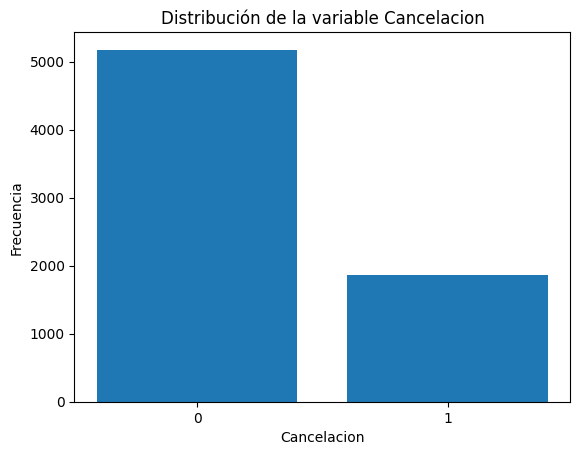

In [67]:
import matplotlib.pyplot as plt

plt.bar(df_telecomx1['Cancelacion'].value_counts().index, df_telecomx1['Cancelacion'].value_counts())
plt.title("Distribución de la variable Cancelacion")
plt.ylabel("Frecuencia")
plt.xlabel("Cancelacion")
plt.xticks(df_telecomx1['Cancelacion'].value_counts().index)
plt.show()


Se puede observar que existe un asimetria entre los clientes que se quedan y se van. Esto puede afectar al modelo de clasificacion al momento de entrenar el mismo y como puede luego generalizar. En pasos posteriores modificare esta "asimetria" con tecnicas de muestreo como el oversampling y la funcion SMOTE.

## Normalización (StandardScaler)
Necesario si vas a usar modelos basados en:

KNN

Regresión logística

SVM

Redes neuronales

In [68]:
from sklearn.preprocessing import StandardScaler

columnas_a_escalar = ['Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Meses_Contrato']
scaler = StandardScaler()
df_telecomx1[columnas_a_escalar] = scaler.fit_transform(df_telecomx1[columnas_a_escalar])


## Visualización de Correlaciones


Gráfico de matriz de correlación (heatmap):

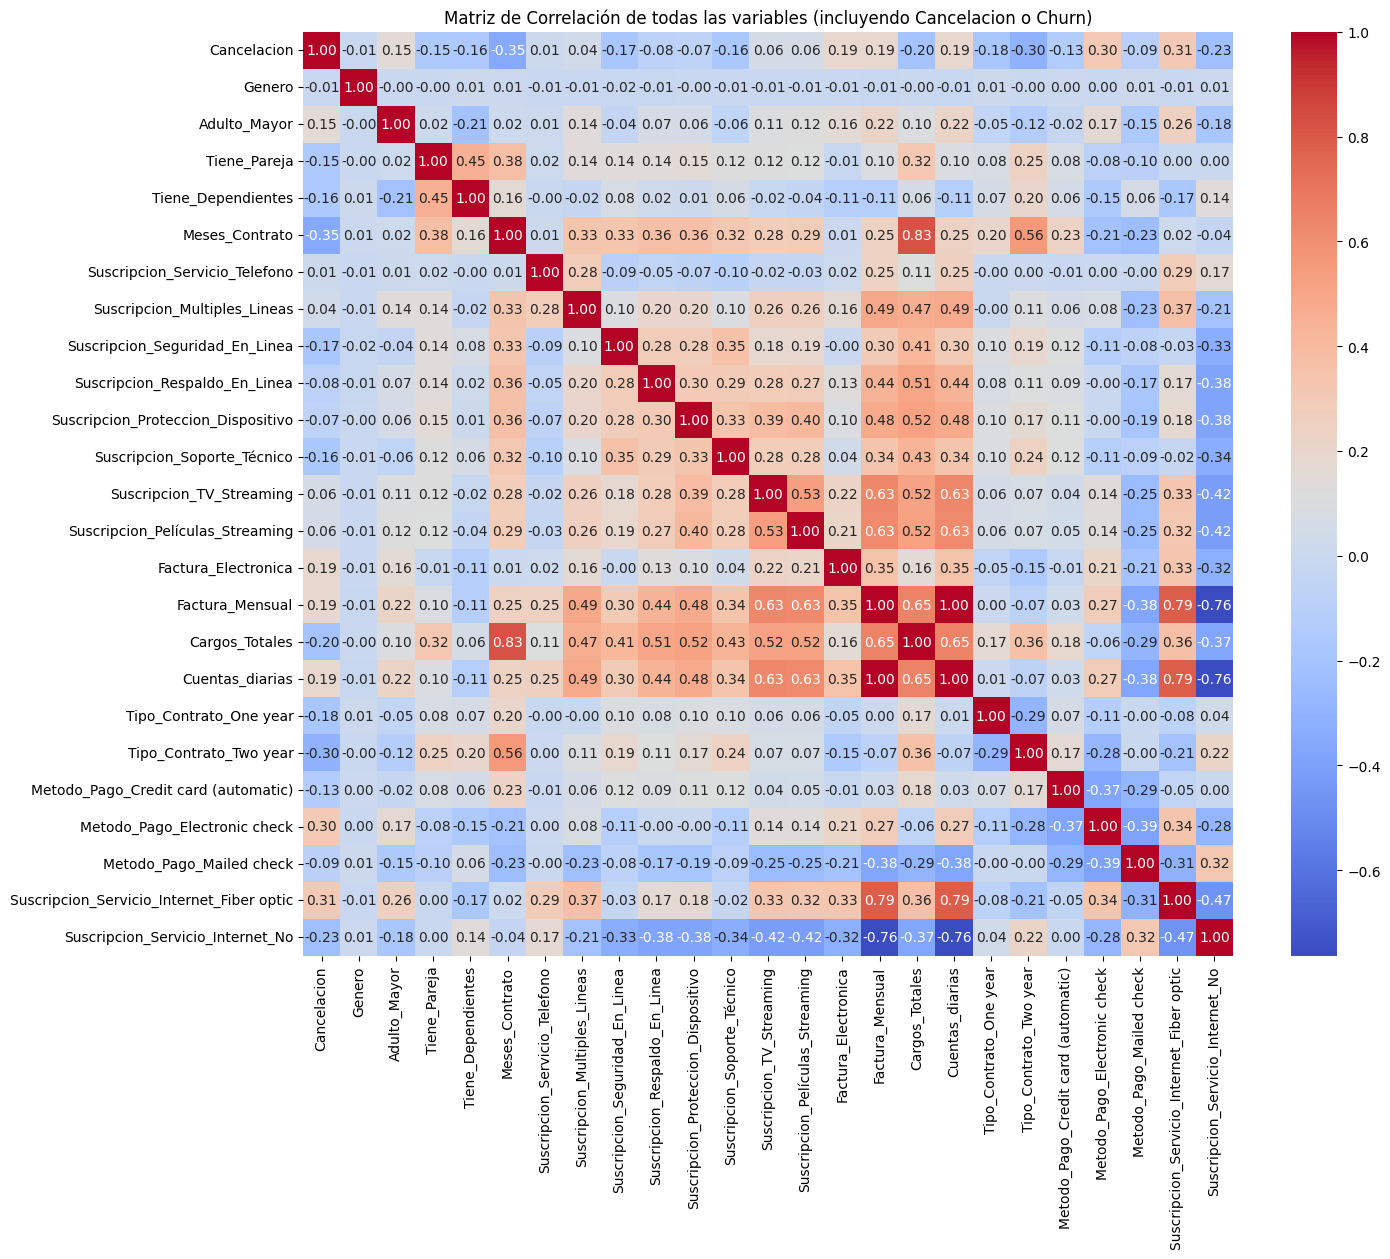

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
sns.heatmap(df_telecomx1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de todas las variables (incluyendo Cancelacion o Churn)')
plt.show()

La matriz de correlación muestra la relación entre variables numéricas. Se observa que la cancelación se asocia positivamente con clientes que usan fibra óptica, pago electrónico y tienen mayor gasto mensual. En cambio, contratos largos y servicios adicionales como soporte técnico se vinculan con menor probabilidad de cancelación.

## Análisis de Variables Clave contra Cancelación
1. Gasto total vs Cancelación (Boxplot)

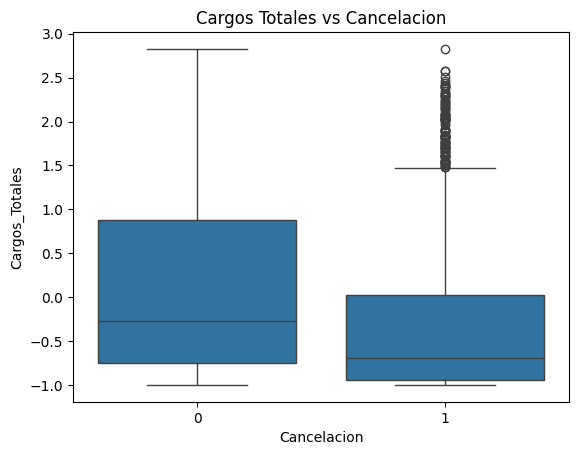

In [70]:
sns.boxplot(x='Cancelacion', y='Cargos_Totales', data=df_telecomx1)
plt.title("Cargos Totales vs Cancelacion")
plt.show()

Aunque hay solapamiento, los clientes que no cancelan suelen tener cargos totales más altos, probablemente porque llevan más tiempo activos. Esto refuerza la relación entre antigüedad y permanencia.

2. Meses de contrato vs Cancelación (Boxplot)

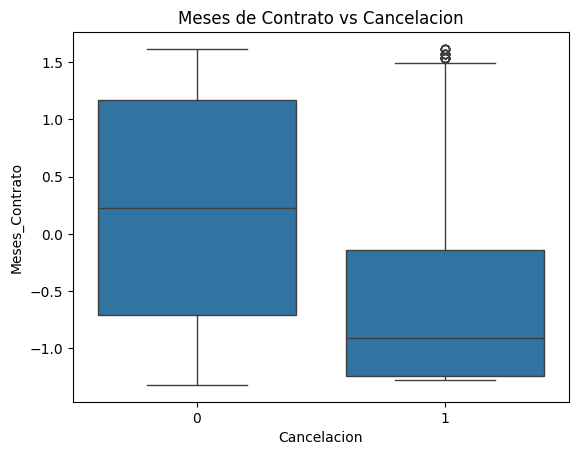

In [71]:
sns.boxplot(x='Cancelacion', y='Meses_Contrato', data=df_telecomx1)
plt.title("Meses de Contrato vs Cancelacion")
plt.show()

Los clientes que cancelan tienden a tener significativamente menos meses de contrato que los que permanecen. Esto sugiere que la permanencia está relacionada con mayor antigüedad en el servicio.

## División de Datos: Entrenamiento y Prueba
¿Por qué?
Separar los datos evita que el modelo se entrene y evalúe con la misma información, lo que ayuda a medir su capacidad de generalización.

In [72]:
from sklearn.model_selection import train_test_split

X = df_telecomx1.drop('Cancelacion', axis=1)  # Variables predictoras
y = df_telecomx1['Cancelacion']               # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Balanceo de Clases con SMOTE
¿Por qué?
Tu dataset tiene una clase minoritaria (clientes que cancelan). SMOTE genera ejemplos sintéticos para equilibrar las clases y evitar que el modelo se sesgue.

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar nueva proporción
print(y_train_smote.value_counts())


Cancelacion
0    4139
1    4139
Name: count, dtype: int64


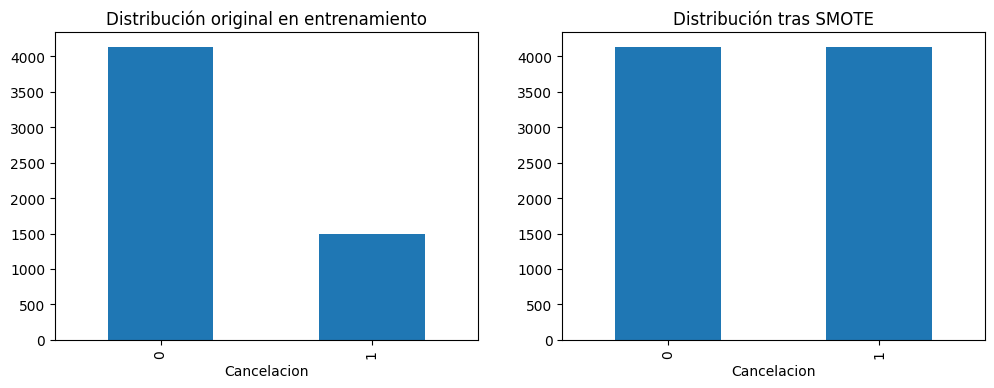

In [74]:
import matplotlib.pyplot as plt

# Distribución original
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar', title='Distribución original en entrenamiento')

# Distribución tras SMOTE
plt.subplot(1,2,2)
y_train_smote.value_counts().plot(kind='bar', title='Distribución tras SMOTE')
plt.show()


El gráfico muestra que originalmente hay un desbalance importante entre clientes que no cancelan y los que sí. Tras aplicar SMOTE, las clases quedan equilibradas, lo que ayuda a que los modelos aprendan de manera justa y no se sesguen hacia la clase mayoritaria.

## Entrenamiento de Modelos


### Modelo 1: Regresión Logística (requiere normalización)
¿Por qué?
Es un modelo interpretable, sensible a la escala de los datos. Útil como línea base.

In [75]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train_smote, y_train_smote)
y_pred_log = modelo_log.predict(X_test)


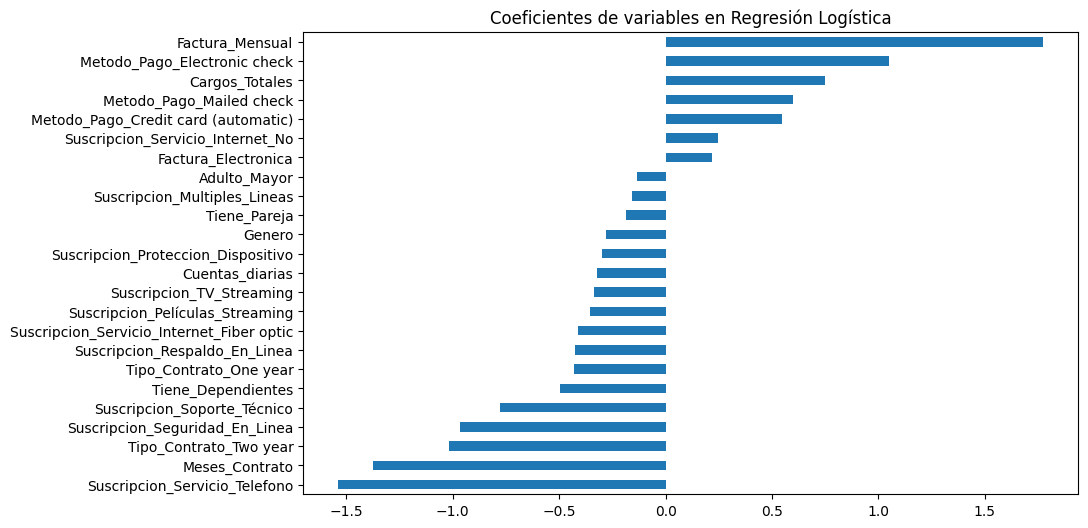

In [76]:
coef = pd.Series(modelo_log.coef_[0], index=X_train.columns)
coef = coef.sort_values()

plt.figure(figsize=(10,6))
coef.plot(kind='barh')
plt.title('Coeficientes de variables en Regresión Logística')
plt.show()

Los coeficientes indican el efecto de cada variable sobre la probabilidad de cancelación: valores positivos aumentan la probabilidad, y negativos la disminuyen. Esto permite interpretar el sentido y fuerza de cada factor en la decisión del cliente.

### Modelo 2: Random Forest (no requiere normalización)
¿Por qué?
Es robusto, maneja bien datos desbalanceados, no necesita escalar, y suele tener buen rendimiento sin mucho ajuste.

In [77]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

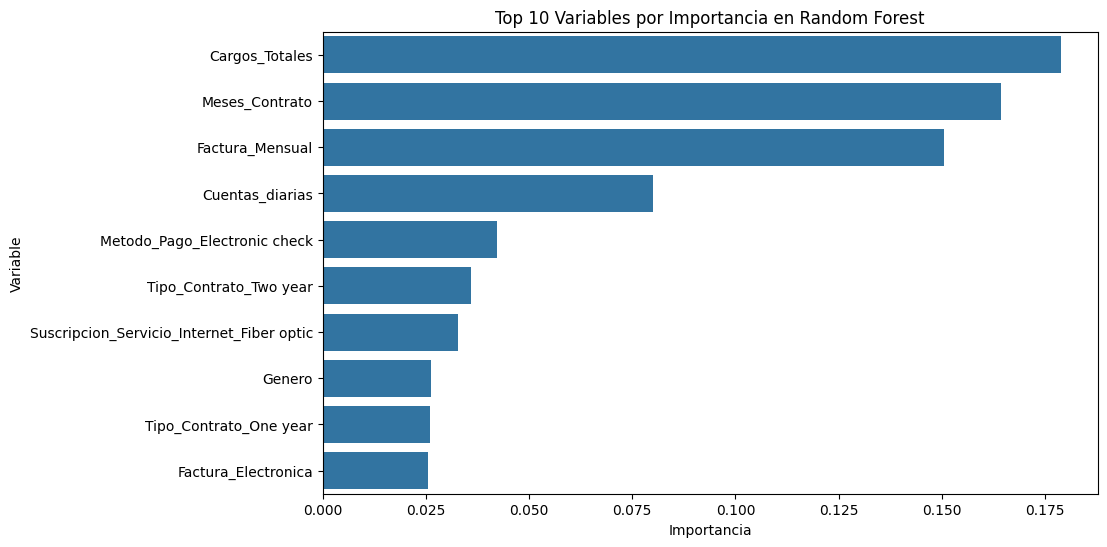

In [78]:
importances = modelo_rf.feature_importances_
feat_names = X_train.columns

df_importance = pd.DataFrame({'Variable': feat_names, 'Importancia': importances})
df_importance = df_importance.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=df_importance.head(10), x='Importancia', y='Variable')
plt.title('Top 10 Variables por Importancia en Random Forest')
plt.show()

Este gráfico revela cuáles variables tienen mayor impacto en la predicción de cancelación según el modelo Random Forest. Las variables con mayor importancia deberían ser consideradas prioritarias para acciones de retención.

## Evaluación de Modelos
¿Para qué?
Evaluar los modelos con métricas cuantitativas (precisión, recall, F1-score) y visuales (matriz de confusión) nos permite entender qué tan bien predicen la cancelación, identificar errores y comparar cuál modelo es mejor.

Reporte Regresión Logística:

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



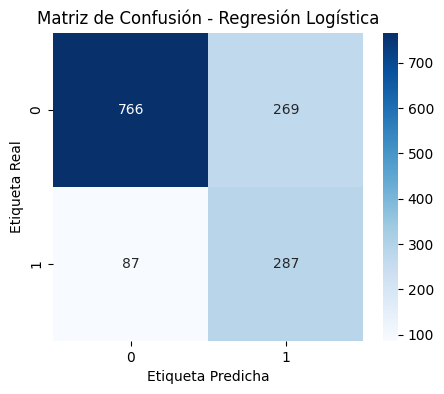

Reporte Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



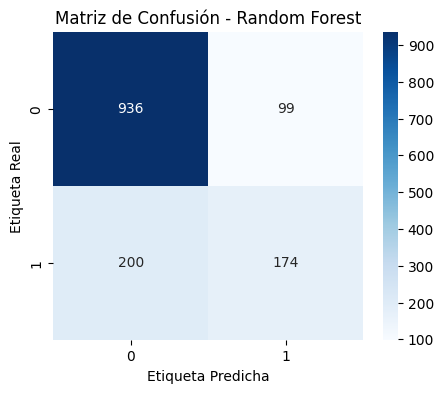

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Evaluar Regresión Logística
print("Reporte Regresión Logística:\n")
print(classification_report(y_test, y_pred_log))
plot_confusion_matrix(y_test, y_pred_log, "Matriz de Confusión - Regresión Logística")

# Evaluar Random Forest
print("Reporte Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest")


Regresión Logística:

Mejor recall para la clase 1 (cancelación), 0.77, es decir, detecta bien a quienes cancelan (menos falsos negativos).

Precisión menor para clase 1 (0.52), indica más falsos positivos (predice cancelación cuando no es así).

Accuracy general es 75%.

Random Forest:

Mejor precisión para clase 0 (no cancelan), 0.82, y accuracy más alta (79%).

Recall para clase 1 más bajo (0.47), es decir, pierde más clientes que cancelan (más falsos negativos).

F1-score para clase 1 también menor (0.54), peor en detectar cancelaciones.

## Interpretación de la importancia de variables
Después de evaluar los modelos con métricas (exactitud, precisión, recall, F1, matriz de confusión), el siguiente paso es entender qué variables son las más influyentes en la predicción de la cancelación según cada modelo.

### 1 Regresión Logística: Coeficientes
¿Qué hacemos?
Extraemos los coeficientes del modelo para identificar qué variables aumentan o disminuyen la probabilidad de cancelación.

Coeficiente positivo → mayor probabilidad de cancelar.

Coeficiente negativo → menor probabilidad de cancelar.

La magnitud indica fuerza del efecto.

In [80]:
# Obtener los nombres de las variables predictoras
features = df_telecomx1.drop(columns=['Cancelacion']).columns

# Extraer los coeficientes del modelo entrenado
coef = modelo_log.coef_[0]

# Crear un DataFrame con los resultados
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coef
})

# Agregar columna de magnitud absoluta para ordenarlas
coef_df['Importancia Absoluta'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia Absoluta', ascending=False)

# Mostrar los coeficientes ordenados
print("Coeficientes de Regresión Logística:")
display(coef_df)


Coeficientes de Regresión Logística:


,Variable,Coeficiente,Importancia Absoluta
14,Factura_Mensual,1.772291,1.772291
5,Suscripcion_Servicio_Telefono,-1.537167,1.537167
4,Meses_Contrato,-1.376417,1.376417
20,Metodo_Pago_Electronic check,1.049380,1.049380
18,Tipo_Contrato_Two year,-1.015435,1.015435
7,Suscripcion_Seguridad_En_Linea,-0.963459,0.963459
10,Suscripcion_Soporte_Técnico,-0.776705,0.776705
15,Cargos_Totales,0.748000,0.748000
21,Metodo_Pago_Mailed check,0.598314,0.598314
19,Metodo_Pago_Credit card (automatic),0.547711,0.547711


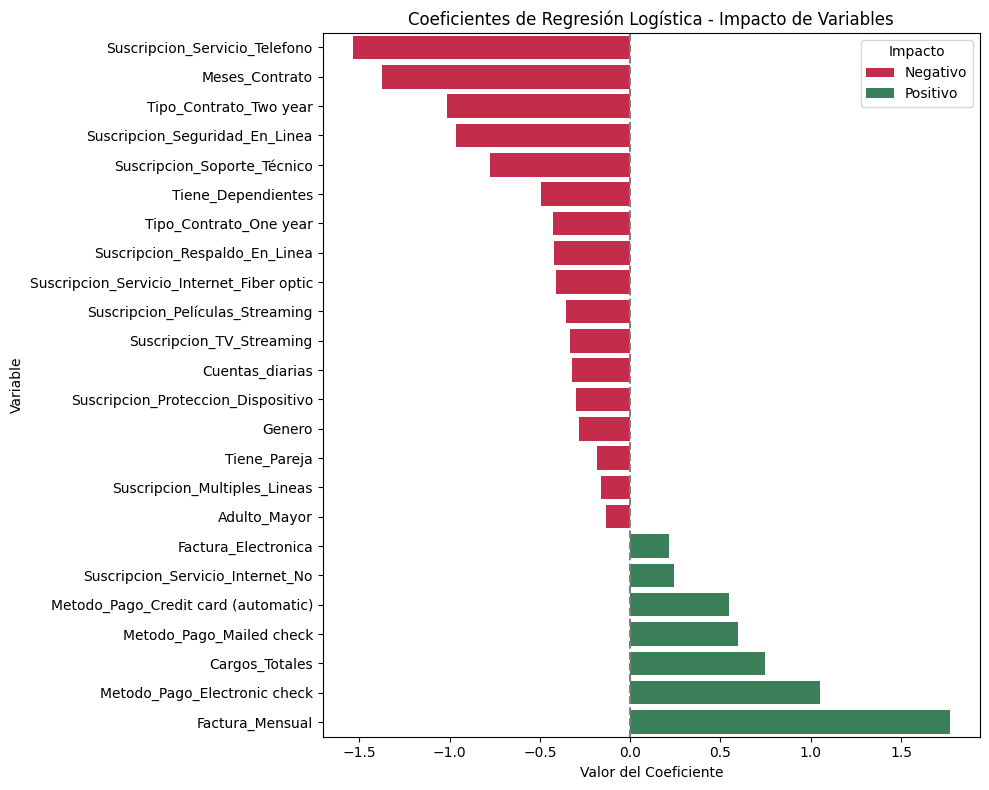

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame de coeficientes
coef_plot_df = coef_df.copy()

# Añadir columna para clasificar el tipo de impacto
coef_plot_df['Impacto'] = coef_plot_df['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')

# Ordenar por la magnitud del coeficiente
coef_plot_df = coef_plot_df.sort_values(by='Coeficiente', ascending=True)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(
    data=coef_plot_df,
    x='Coeficiente',
    y='Variable',
    hue='Impacto',
    dodge=False,
    palette={'Positivo': 'seagreen', 'Negativo': 'crimson'}
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Coeficientes de Regresión Logística - Impacto de Variables')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.legend(title='Impacto')
plt.tight_layout()
plt.show()


Los coeficientes indican cuánto influye cada variable en la probabilidad de cancelación. Las variables con coeficientes positivos, como Factura Mensual y Pago con Electronic Check, aumentan la probabilidad de cancelación. En cambio, variables como Meses de Contrato, Servicio Telefónico o Soporte Técnico tienen coeficientes negativos, indicando que reducen la probabilidad de cancelación.

La magnitud del coeficiente refleja la fuerza del impacto: por ejemplo, Factura Mensual tiene el mayor coeficiente absoluto, por lo tanto, es una de las variables más influyentes en el modelo.

### Random Forest Importancia de Variables

/tmp/ipython-input-3957205416.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


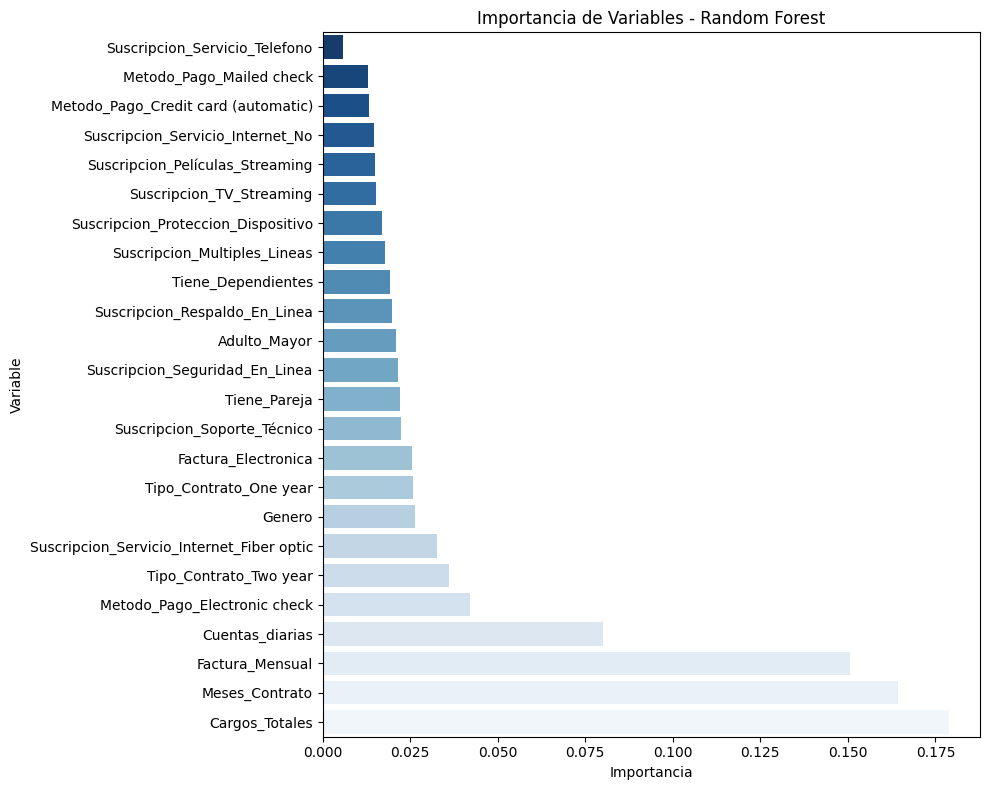

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con la importancia de las variables
importancia_rf_df = pd.DataFrame({
    'Variable': features,
    'Importancia': modelo_rf.feature_importances_
})

# Ordenar por importancia descendente
importancia_rf_df = importancia_rf_df.sort_values(by='Importancia', ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importancia_rf_df,
    x='Importancia',
    y='Variable',
    palette='Blues_r'
)

plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


El modelo Random Forest identifica las variables que más contribuyen a tomar decisiones en la predicción de cancelación. Entre las más importantes destacan Meses de Contrato, Cargos Totales y Factura Mensual, lo que indica que el comportamiento financiero y la duración del contrato son factores clave. Estas variables ayudaron al modelo a separar con mayor precisión a los clientes que cancelan de los que no.

El gráfico muestra cómo estas variables tienen mayor peso en la toma de decisiones dentro del modelo, y por tanto son prioritarias para estrategias de retención.

# Informe Final

## 1. Carga y limpieza de datos
Se cargó el archivo CSV directamente desde GitHub mediante pandas



```
url = 'https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/df_telecomx1.csv'
df_telecomx1 = pd.read_csv(url)
```



### Limpieza inicial

Se eliminaron columnas irrelevantes como ID_Cliente.

Se transformaron valores categóricos de yes/no a 1/0.

Se verificaron y trataron valores nulos en algunas columnas de servicios.

Se aplicó codificación One-Hot para variables categóricas.

## 2. Exploracion de datos

### Distribución de la variable objetivo
Se analizó la variable Cancelacion



```
 df_telecomx1['Cancelacion'].value_counts(normalize=True)
```



Resultado:

Clientes que permanecen: 73.46%

Clientes que cancelan: 26.54%

📉 Esto muestra un desbalance moderado entre clases, lo que motivó el uso de técnicas de balanceo.



![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/1_distribucion_cancelacion.png)


Se observó una clara asimetría que podría afectar el entrenamiento del modelo. Se utilizaron técnicas como SMOTE para compensar esta diferencia.

## 3. Normalización
Se aplicó normalización con StandardScaler para variables utilizadas en modelos basados en distancia (como regresión logística):



```
from sklearn.preprocessing import StandardScaler

columnas_a_escalar = ['Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias', 'Meses_Contrato']
scaler = StandardScaler()
df_telecomx1[columnas_a_escalar] = scaler.fit_transform(df_telecomx1[columnas_a_escalar])
```



## 4. Correlación de Variables
Se construyó una matriz de correlación para detectar variables numéricas relevantes:

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/2_matriz_correlacion.png)

---

Las variables con mayor correlación con Cancelacion fueron:

Meses_Contrato (−0.35)

Tipo_Contrato_Two year (−0.30)

Metodo_Pago_Electronic check (+0.30)

La duración del contrato y el tipo de pago influyen fuertemente en la cancelación.

## 5. Análisis Gráfico de Variables Específicas

### Meses de Contrato vs Cancelación

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/4_boxplot_Meses_Contrato_vs_Cancelacion.png)

---

Los clientes que permanecen suelen tener más tiempo de contrato.

### Cargos Totales vs Cancelación

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/3_boxplot_Cargos_Totales_vs_Cancelacion.png)

---

Los clientes que cancelan tienden a tener facturación acumulada más baja.

## 6. División del Conjunto de Datos
Se dividieron los datos en entrenamiento (80%) y prueba (20%):



```
from sklearn.model_selection import train_test_split

X = df_telecomx1.drop('Cancelacion', axis=1)
y = df_telecomx1['Cancelacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```



### Además, se aplicó SMOTE para balancear la clase minoritaria:



```
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

```



![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/5_Distribucion_original_vs_SMOTE.png)

---

El gráfico muestra que originalmente hay un desbalance importante entre clientes que no cancelan y los que sí. Tras aplicar SMOTE, las clases quedan equilibradas, lo que ayuda a que los modelos aprendan de manera justa y no se sesguen hacia la clase mayoritaria.

## 7. Entrenamiento de Modelos

#### Modelo 1: Regresión Logística
 Coeficiente:

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/6_Coeficientes_Regresion_Logistica.png)

---

Los coeficientes indican el efecto de cada variable sobre la probabilidad de cancelación: valores positivos aumentan la probabilidad, y negativos la disminuyen. Esto permite interpretar el sentido y fuerza de cada factor en la decisión del cliente.

#### Modelo 2: Random Forest

Importancia de Variables - Random Forest

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/7_Importancia_Variables_RandomForest.png)

---

Este gráfico revela cuáles variables tienen mayor impacto en la predicción de cancelación según el modelo Random Forest. Las variables con mayor importancia deberían ser consideradas prioritarias para acciones de retención.

## 8. Evaluación de Modelos

Se evaluaron con métricas estándar:

¿Para qué? Evaluar los modelos con métricas cuantitativas (precisión, recall, F1-score) y visuales (matriz de confusión) nos permite entender qué tan bien predicen la cancelación, identificar errores y comparar cuál modelo es mejor.

Matrices de Confusión (Lógica y Random Forest)

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/8_Matrices_Confusion_Modelos.png)

Regresión Logística detecta mejor a los que cancelan (mayor recall).

Random Forest tiene mejor rendimiento general (accuracy).

## 9. Interpretación de los Modelos


#### Coeficiente de regresión logistica

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/9_Coeficientes_Regresion_Logistica.png)


Los coeficientes más importantes fueron:

Factura_Mensual: +1.77

Suscripcion_Servicio_Telefono: −1.53

Meses_Contrato: −1.37

Interpretación: Las variables económicas y de contrato afectan directamente la cancelación.

Se visualizó con un gráfico de barras ordenado por importancia.

#### Importancia en Random Forest

Se construyó un gráfico de importancia de variables

![](https://raw.githubusercontent.com/Emanuel-Acosta/challege-telecom-X2/main/graficos/10_Importancia_Variables_RandomForest.png)


Las variables más importantes fueron:

- Meses_Contrato

- Cargos_Totales

- Factura_Mensual

## 10. Conclusión Estratégica Final

Principales factores que influyen en la cancelación:

- Contratos mensuales y de corta duración.

- Métodos de pago electrónicos (mayor riesgo).

- Facturas mensuales altas y sin servicios adicionales activos.

- Estrategias de retención recomendadas:

- Ofrecer descuentos o beneficios por contratos largos (1 o 2 años).

- Incentivar el uso de servicios como soporte técnico o respaldo en línea.

- Ofrecer planes personalizados para clientes con cargos altos o métodos de pago electrónicos.



## 11. Recomendaciones Futuros Pasos

- Aplicar estos modelos en tiempo real para detectar clientes en riesgo.

- Usar nuevos datos (satisfacción, quejas, soporte) para enriquecer el análisis.

- Refinar modelos con técnicas de optimización y más datos históricos.